In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#data=pd.read_csv('drive/MyDrive/Colab Notebooks/data3.csv',sep=';',encoding='utf-8')
#data=pd.read_excel('drive/MyDrive/Colab Notebooks/data3.xlsx')
data=pd.read_excel('data3.xls')
data

,province.name,province.code,candidate.name,candidate.gender,pp,pp.acronym,pp.faction,elected,legislative.representation,prov.region,candidate.gender.label,position.label,election.year.calendar
0,BUENOS AIRES,1,ALEJANDRO ARMENDARIZ,1,UNION CIVICA RADICAL,UCR,NaN,1,1,CENTRO,Varón,Gobernador/a,1983
1,BUENOS AIRES,1,ELVA ROULET,2,UNION CIVICA RADICAL,UCR,NaN,1,1,CENTRO,Mujer,Vicebogernador/a,1983
2,BUENOS AIRES,1,MARIANO LORENCES,1,PARTIDO INTRANSIGENTE,PI,NaN,0,1,CENTRO,Varón,Gobernador/a,1983
3,BUENOS AIRES,1,RICARDO BALBI,1,PARTIDO INTRANSIGENTE,PI,NaN,0,1,CENTRO,Varón,Vicebogernador/a,1983
4,BUENOS AIRES,1,HERMINIO IGLESIAS,1,PARTIDO JUSTICIALISTA,PJ,NaN,0,1,CENTRO,Varón,Gobernador/a,1983
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,CABA,24,GISELA MARZIOTTA,2,FRENTE DE TODOS,FDT,NaN,0,1,CENTRO,Mujer,Vicebogernador/a,2019
3758,CABA,24,MATIAS TOMBOLINI,1,CONSENSO FEDERAL,NaN,NaN,0,1,CENTRO,Varón,Gobernador/a,2019
3759,CABA,24,DANIELA GASPARINI,2,CONSENSO FEDERAL,NaN,NaN,0,1,CENTRO,Mujer,Vicebogernador/a,2019
3760,CABA,24,GABRIEL SOLANO,1,FRENTE DE IZQUIERDA Y DE LOS TRABAJADORES,FIT,NaN,0,1,CENTRO,Varón,Gobernador/a,2019


In [4]:
data.isnull().sum()

province.name                    0
province.code                    0
candidate.name                  30
candidate.gender                 0
pp                               0
pp.acronym                     538
pp.faction                    3376
elected                          0
legislative.representation       0
prov.region                      0
candidate.gender.label           0
position.label                   0
election.year.calendar           0
dtype: int64

In [5]:
data['candidate.gender.label'].value_counts()

Varón    3087
Mujer     570
n/d       105
Name: candidate.gender.label, dtype: int64

In [6]:
data['gender%']=1

In [7]:
data2=pd.DataFrame(data.groupby(['province.code','province.name','election.year.calendar','position.label','candidate.gender.label'])['candidate.gender.label'].count()/data.groupby(['province.code','province.name','election.year.calendar','position.label'])['gender%'].sum()*100,columns=['gender%'])
data2.reset_index(inplace=True)
data2

,province.code,province.name,election.year.calendar,position.label,candidate.gender.label,gender%
0,1,BUENOS AIRES,1983,Gobernador/a,Mujer,7.142857
1,1,BUENOS AIRES,1983,Gobernador/a,Varón,92.857143
2,1,BUENOS AIRES,1983,Vicebogernador/a,Mujer,21.428571
3,1,BUENOS AIRES,1983,Vicebogernador/a,Varón,78.571429
4,1,BUENOS AIRES,1987,Gobernador/a,Mujer,7.142857
...,...,...,...,...,...,...
785,24,CABA,2015,Gobernador/a,Varón,80.000000
786,24,CABA,2015,Vicebogernador/a,Varón,100.000000
787,24,CABA,2019,Gobernador/a,Varón,100.000000
788,24,CABA,2019,Vicebogernador/a,Mujer,75.000000


In [8]:
data3=pd.pivot_table(data=data,values='gender%',aggfunc='sum',columns='candidate.gender.label',index={'province.code','province.name','election.year.calendar','position.label'})
data3.fillna(0,inplace=True)
data3['Mujer2']=data3['Mujer']/(data3['Mujer']+data3['Varón'])*100
data3['Varón']=data3['Varón']/(data3['Mujer']+data3['Varón'])*100
data3['Mujer']=data3['Mujer2']
data3.drop('Mujer2',axis=1,inplace=True)
data3.reset_index(inplace=True)
data3

candidate.gender.label,election.year.calendar,position.label,province.name,province.code,Mujer,Varón,n/d
0,1983,Gobernador/a,BUENOS AIRES,1,7.142857,92.857143,0.0
1,1983,Gobernador/a,CATAMARCA,2,9.090909,90.909091,0.0
2,1983,Gobernador/a,CHACO,3,0.000000,100.000000,0.0
3,1983,Gobernador/a,CHUBUT,4,0.000000,100.000000,0.0
4,1983,Gobernador/a,CORDOBA,5,0.000000,100.000000,0.0
...,...,...,...,...,...,...,...
467,2019,Vicebogernador/a,SAN LUIS,18,33.333333,66.666667,0.0
468,2019,Vicebogernador/a,SANTA CRUZ,19,38.461538,61.538462,0.0
469,2019,Vicebogernador/a,SANTA FE,20,100.000000,0.000000,0.0
470,2019,Vicebogernador/a,TIERRA DEL FUEGO,22,33.333333,66.666667,0.0


In [9]:
(data3['Mujer']+data3['Varón']).value_counts()

100.0    417
100.0     45
100.0      3
dtype: int64

g=sns.FacetGrid(data=data2,row='province.name',col='position.label',hue='candidate.gender.label',margin_titles=True,palette={'pink','blue','black'})
g.map(sns.lineplot,'election.year.calendar','gender%')
g.add_legend(title='Género',)
g.set_axis_labels('Año','Porcentaje')
g.fig.suptitle("Porcentaje de candidatos por género 1983-2019",fontsize = 'x-large',fontweight = 'bold')
g.fig.subplots_adjust(top=0.971,hspace=0.1)
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)

In [10]:
data3.to_csv('candidaturas_pcia_ano.csv')

In [11]:
rangox=np.sort(data2['election.year.calendar'].unique())
print(rangox)

[1983 1987 1988 1991 1993 1995 1996 1997 1999 2000 2001 2002 2003 2005
 2007 2008 2009 2011 2013 2015 2017 2019]


C:\Users\Dell\AppData\Local\Temp\ipykernel_15040\3020612920.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[code-1,0].set_yticklabels(rangoy,size=14)
C:\Users\Dell\AppData\Local\Temp\ipykernel_15040\3020612920.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[code-1,1].set_yticklabels(rangoy,size=14)
C:\Users\Dell\AppData\Local\Temp\ipykernel_15040\3020612920.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[code-1,0].set_yticklabels(rangoy,size=14)
C:\Users\Dell\AppData\Local\Temp\ipykernel_15040\3020612920.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[code-1,1].set_yticklabels(rangoy,size=14)
C:\Users\Dell\AppData\Local\Temp\ipykernel_15040\3020612920.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[code-1,0].set_yticklabels(rangoy,size=14)
C:\Users\Dell\AppData\Local\Temp\ipykernel_15040\302061

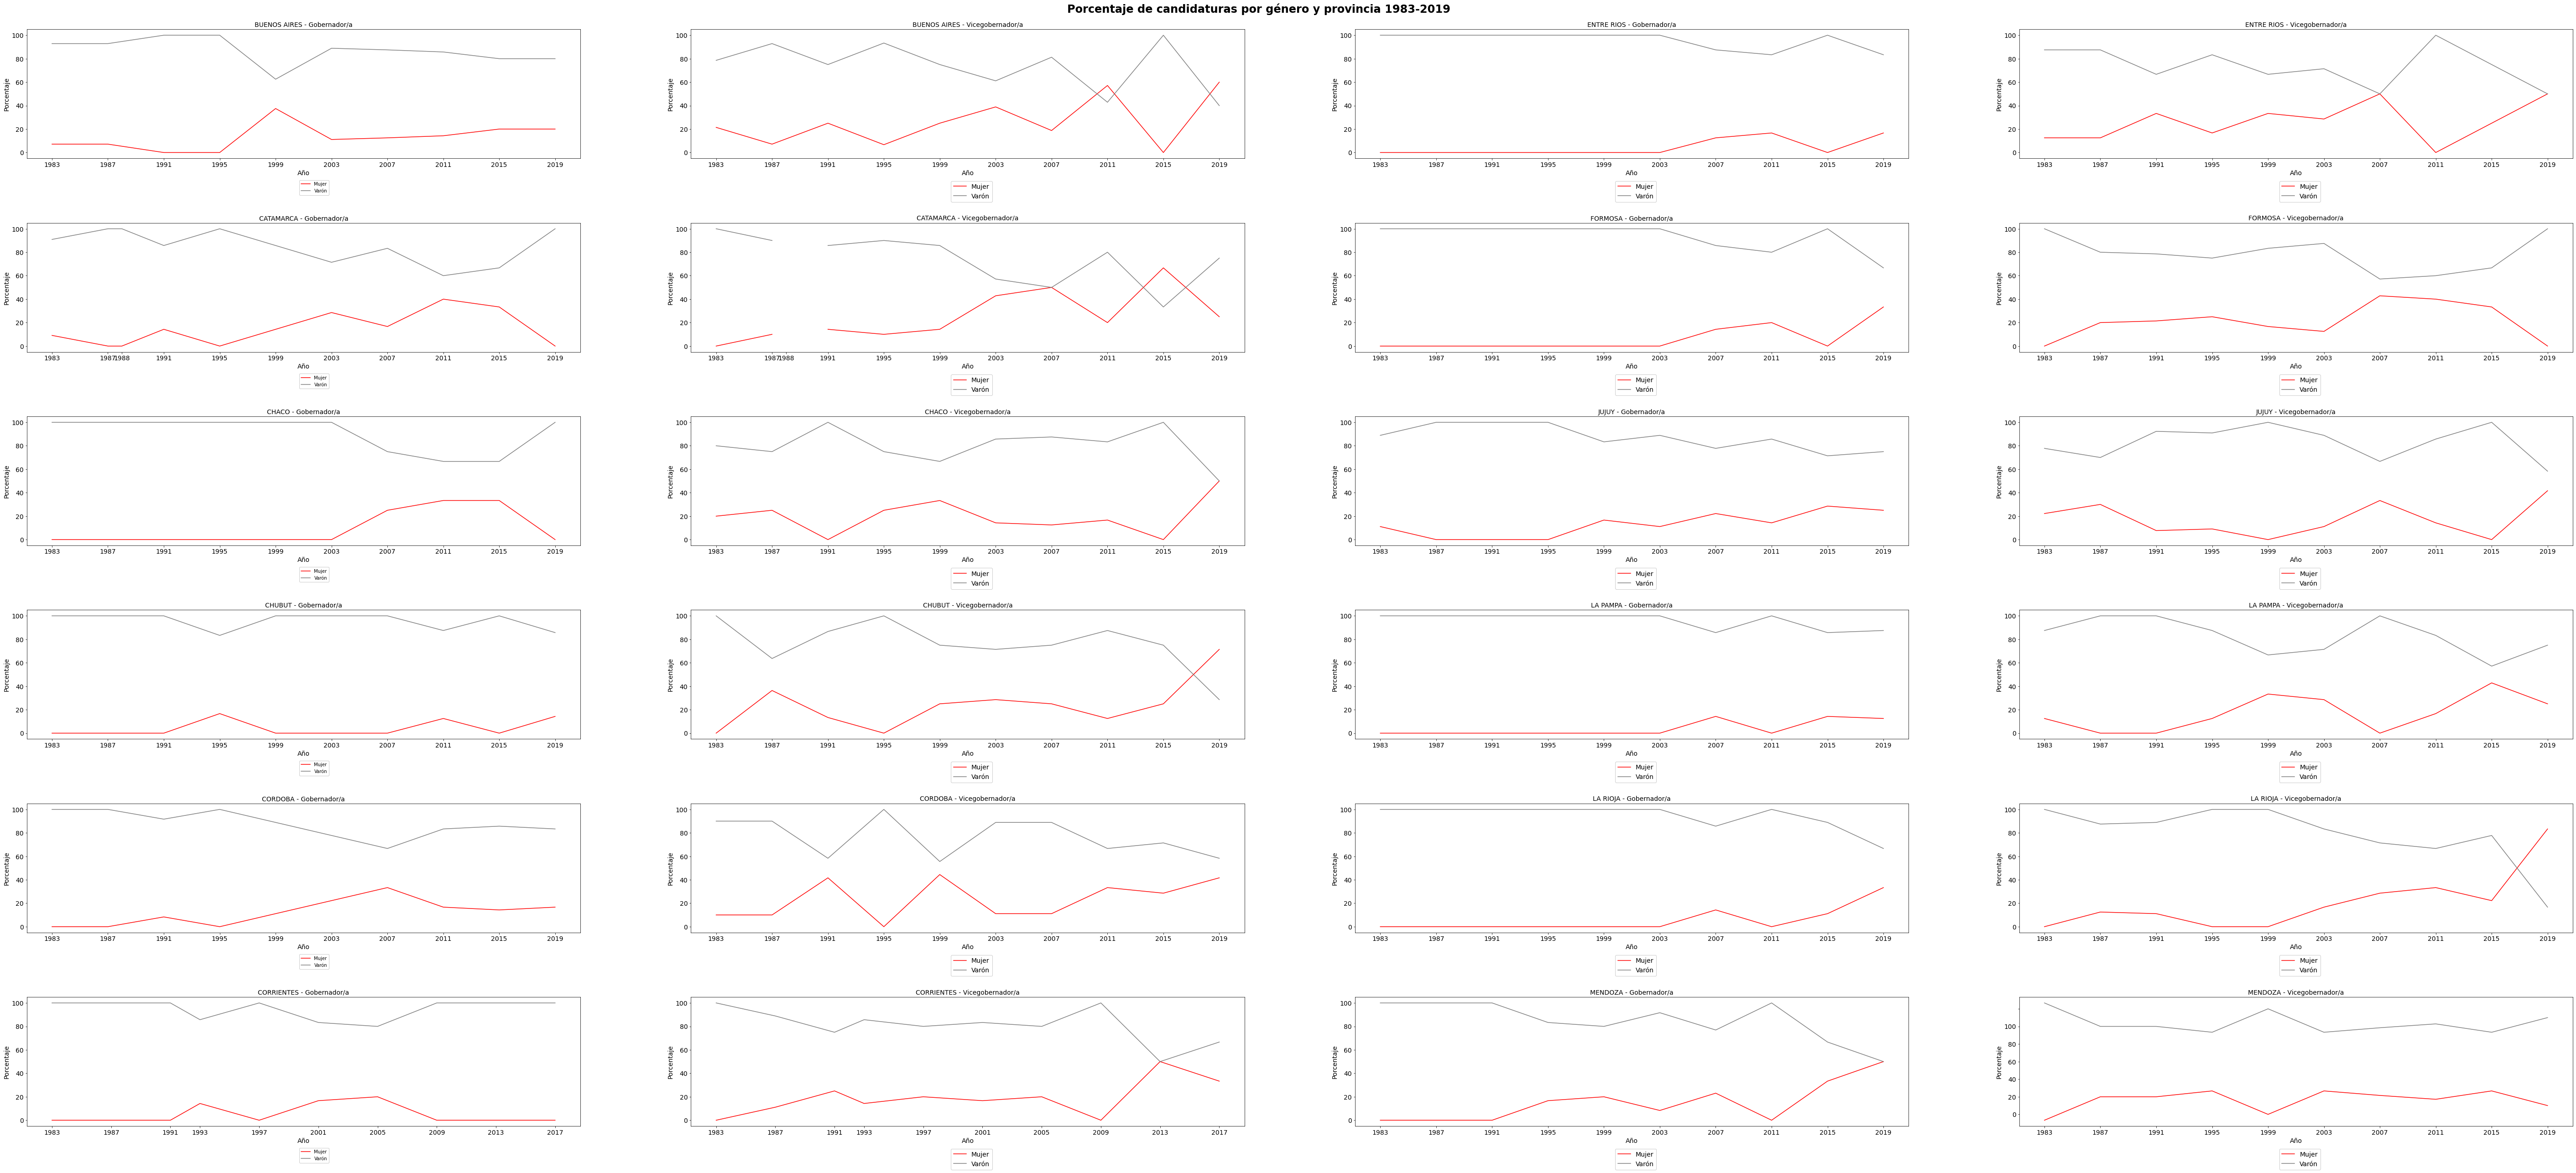

In [71]:
#Creación de gráficos en dos bloques
#Años electorales para ver en el eje X:
rangoy=np.arange(-20,120,20)
fig, ax = plt.subplots(nrows=(data3['province.code'].max()/4).astype(int),ncols=4,figsize=(100,40))
fig.suptitle("Porcentaje de candidaturas por género y provincia 1983-2019",fontsize = 24,fontweight = 'bold')
fig.subplots_adjust(top=0.96,hspace=0.5)

for code in range(1,7):
    rangox=data3[data3['province.code']==code]['election.year.calendar'].unique()
    ax[code-1,0].plot(data3[(data3['province.code']==code)&(data3['position.label']=='Gobernador/a')]['election.year.calendar'],
                      data3[(data3['province.code']==code)&(data3['position.label']=='Gobernador/a')]['Mujer'],color='red')
    ax[code-1,0].plot(data3[(data3['province.code']==code)&(data3['position.label']=='Gobernador/a')]['election.year.calendar'],
                      data3[(data3['province.code']==code)&(data3['position.label']=='Gobernador/a')]['Varón'],color='gray')
    ax[code-1,0].set_xlabel('Año',size=14)
    ax[code-1,0].set_ylabel('Porcentaje',size=14)
    ax[code-1,0].set_title((data3[data3['province.code']==code]['province.name'].iloc[0]+ ' - Gobernador/a'),size=14)
    ax[code-1,0].set_xticks(rangox)
    ax[code-1,0].set_xticklabels(rangox,size=14)
    ax[code-1,0].set_yticklabels(rangoy,size=14)
    ax[code-1,0].legend(['Mujer','Varón'],fancybox=True, framealpha=1,frameon=True, bbox_to_anchor=(0.55,-0.15))
    ax[code-1,1].plot(data3[(data3['province.code']==code)&(data3['position.label']=='Vicebogernador/a')]['election.year.calendar'],
                      data3[(data3['province.code']==code)&(data3['position.label']=='Vicebogernador/a')]['Mujer'],color='red')
    ax[code-1,1].plot(data3[(data3['province.code']==code)&(data3['position.label']=='Vicebogernador/a')]['election.year.calendar'],
                      data3[(data3['province.code']==code)&(data3['position.label']=='Vicebogernador/a')]['Varón'],color='gray')
    ax[code-1,1].set_xlabel('Año',size=14)
    ax[code-1,1].set_ylabel('Porcentaje',size=14)
    ax[code-1,1].set_title((data3[data3['province.code']==code]['province.name'].iloc[0]+ ' - Vicegobernador/a'),size=14)
    ax[code-1,1].set_xticks(rangox)
    ax[code-1,1].set_xticklabels(rangox,size=14)
    ax[code-1,1].set_yticklabels(rangoy,size=14)
    ax[code-1,1].legend(['Mujer','Varón'],fancybox=True, framealpha=1,frameon=True, bbox_to_anchor=(0.55,-0.15),prop={'size': 14})

for code in range(7,13):
    rangox=data3[data3['province.code']==code]['election.year.calendar'].unique()
    ax[code-13,2].plot(data3[(data3['province.code']==code)&(data3['position.label']=='Gobernador/a')]['election.year.calendar'],
                      data3[(data3['province.code']==code)&(data3['position.label']=='Gobernador/a')]['Mujer'],color='red')
    ax[code-13,2].plot(data3[(data3['province.code']==code)&(data3['position.label']=='Gobernador/a')]['election.year.calendar'],
                      data3[(data3['province.code']==code)&(data3['position.label']=='Gobernador/a')]['Varón'],color='gray')
    ax[code-13,2].set_xlabel('Año',size=14)
    ax[code-13,2].set_ylabel('Porcentaje',size=14)
    ax[code-13,2].set_title((data3[data3['province.code']==code]['province.name'].iloc[0]+ ' - Gobernador/a'),size=14)
    ax[code-13,2].set_xticks(rangox)
    ax[code-13,2].set_xticklabels(rangox,size=14)
    ax[code-13,2].set_yticklabels(rangoy,size=14)
    ax[code-13,2].legend(['Mujer','Varón'],fancybox=True, framealpha=1,frameon=True, bbox_to_anchor=(0.55,-0.15),prop={'size': 14})
    ax[code-13,3].plot(data3[(data3['province.code']==code)&(data3['position.label']=='Vicebogernador/a')]['election.year.calendar'],
                      data3[(data3['province.code']==code)&(data3['position.label']=='Vicebogernador/a')]['Mujer'],color='red')
    ax[code-13,3].plot(data3[(data3['province.code']==code)&(data3['position.label']=='Vicebogernador/a')]['election.year.calendar'],
                      data3[(data3['province.code']==code)&(data3['position.label']=='Vicebogernador/a')]['Varón'],color='gray')
    ax[code-13,3].set_xlabel('Año',size=14)
    ax[code-13,3].set_ylabel('Porcentaje',size=14)
    ax[code-13,3].set_title((data3[data3['province.code']==code]['province.name'].iloc[0]+ ' - Vicegobernador/a'),size=14)
    ax[code-13,3].set_xticks(rangox)
    ax[code-13,3].set_xticklabels(rangox,size=14)
    ax[code-13,3].set_yticklabels(rangoy,size=14)
    ax[code-13,3].legend(['Mujer','Varón'],fancybox=True, framealpha=1,frameon=True, bbox_to_anchor=(0.55,-0.15),prop={'size': 14})

    

plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_15040\173100253.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2[code-19,0].set_yticklabels(rangoy,size=14)
C:\Users\Dell\AppData\Local\Temp\ipykernel_15040\173100253.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2[code-19,1].set_yticklabels(rangoy,size=14)
C:\Users\Dell\AppData\Local\Temp\ipykernel_15040\173100253.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2[code-19,0].set_yticklabels(rangoy,size=14)
C:\Users\Dell\AppData\Local\Temp\ipykernel_15040\173100253.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2[code-19,1].set_yticklabels(rangoy,size=14)
C:\Users\Dell\AppData\Local\Temp\ipykernel_15040\173100253.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2[code-19,0].set_yticklabels(rangoy,size=14)
C:\Users\Dell\AppData\Local\Temp\ipykernel_15040\1

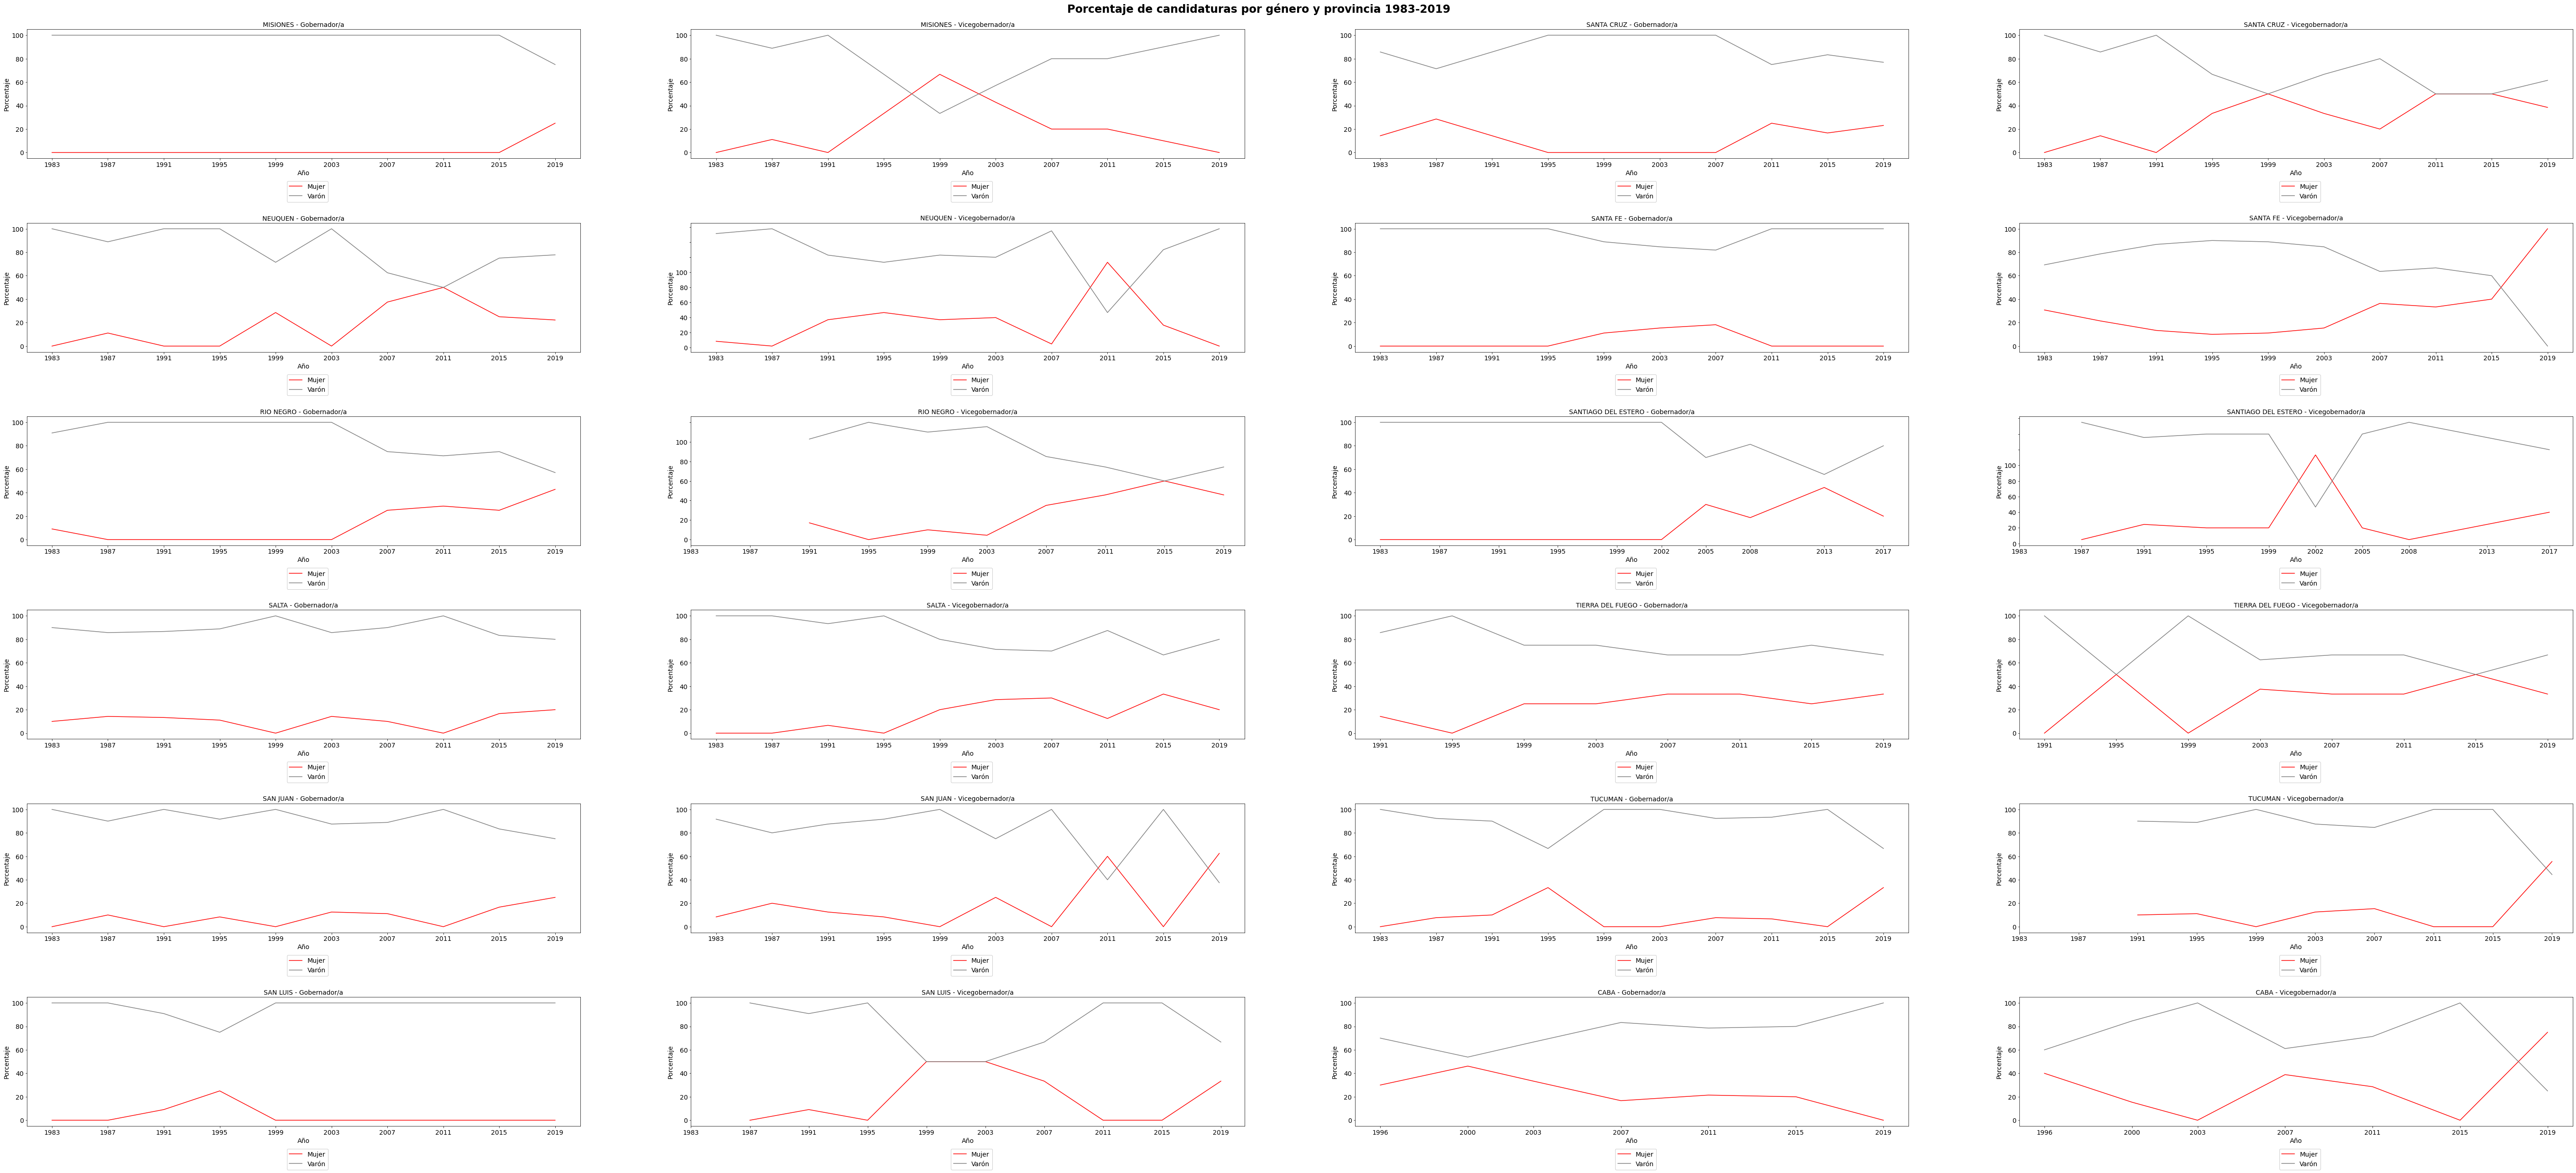

In [72]:
fig2, ax2 = plt.subplots(nrows=(data3['province.code'].max()/4).astype(int),ncols=4,figsize=(100,40))
fig2.suptitle("Porcentaje de candidaturas por género y provincia 1983-2019",fontsize = 24,fontweight = 'bold')
fig2.subplots_adjust(top=0.96,hspace=0.5)
for code in range(13,19):
    rangox=data3[data3['province.code']==code]['election.year.calendar'].unique()
    ax2[code-19,0].plot(data3[(data3['province.code']==code)&(data3['position.label']=='Gobernador/a')]['election.year.calendar'],
                      data3[(data3['province.code']==code)&(data3['position.label']=='Gobernador/a')]['Mujer'],color='red')
    ax2[code-19,0].plot(data3[(data3['province.code']==code)&(data3['position.label']=='Gobernador/a')]['election.year.calendar'],
                      data3[(data3['province.code']==code)&(data3['position.label']=='Gobernador/a')]['Varón'],color='gray')
    ax2[code-19,0].set_xlabel('Año',size=14)
    ax2[code-19,0].set_ylabel('Porcentaje',size=14)
    ax2[code-19,0].set_title((data3[data3['province.code']==code]['province.name'].iloc[0]+ ' - Gobernador/a'),size=14)
    ax2[code-19,0].set_xticks(rangox)
    ax2[code-19,0].set_xticklabels(rangox,size=14)
    ax2[code-19,0].set_yticklabels(rangoy,size=14)
    ax2[code-19,0].legend(['Mujer','Varón'],fancybox=True, framealpha=1,frameon=True, bbox_to_anchor=(0.55,-0.15),prop={'size': 14})
    ax2[code-19,1].plot(data3[(data3['province.code']==code)&(data3['position.label']=='Vicebogernador/a')]['election.year.calendar'],
                      data3[(data3['province.code']==code)&(data3['position.label']=='Vicebogernador/a')]['Mujer'],color='red')
    ax2[code-19,1].plot(data3[(data3['province.code']==code)&(data3['position.label']=='Vicebogernador/a')]['election.year.calendar'],
                      data3[(data3['province.code']==code)&(data3['position.label']=='Vicebogernador/a')]['Varón'],color='gray')
    ax2[code-19,1].set_xlabel('Año',size=14)
    ax2[code-19,1].set_ylabel('Porcentaje',size=14)
    ax2[code-19,1].set_title((data3[data3['province.code']==code]['province.name'].iloc[0]+ ' - Vicegobernador/a'),size=14)
    ax2[code-19,1].set_xticks(rangox)
    ax2[code-19,1].set_xticklabels(rangox,size=14)
    ax2[code-19,1].set_yticklabels(rangoy,size=14)
    ax2[code-19,1].legend(['Mujer','Varón'],fancybox=True, framealpha=1,frameon=True, bbox_to_anchor=(0.55,-0.15),prop={'size': 14})

for code in range(19,25):
    rangox=data3[data3['province.code']==code]['election.year.calendar'].unique()
    ax2[code-25,2].plot(data3[(data3['province.code']==code)&(data3['position.label']=='Gobernador/a')]['election.year.calendar'],
                      data3[(data3['province.code']==code)&(data3['position.label']=='Gobernador/a')]['Mujer'],color='red')
    ax2[code-25,2].plot(data3[(data3['province.code']==code)&(data3['position.label']=='Gobernador/a')]['election.year.calendar'],
                      data3[(data3['province.code']==code)&(data3['position.label']=='Gobernador/a')]['Varón'],color='gray')
    ax2[code-25,2].set_xlabel('Año',size=14)
    ax2[code-25,2].set_ylabel('Porcentaje',size=14)
    ax2[code-25,2].set_title((data3[data3['province.code']==code]['province.name'].iloc[0]+ ' - Gobernador/a'),size=14)
    ax2[code-25,2].set_xticks(rangox)
    ax2[code-25,2].set_xticklabels(rangox,size=14)
    ax2[code-25,2].set_yticklabels(rangoy,size=14)
    ax2[code-25,2].legend(['Mujer','Varón'],fancybox=True, framealpha=1,frameon=True, bbox_to_anchor=(0.55,-0.15),prop={'size': 14})
    ax2[code-25,3].plot(data3[(data3['province.code']==code)&(data3['position.label']=='Vicebogernador/a')]['election.year.calendar'],
                      data3[(data3['province.code']==code)&(data3['position.label']=='Vicebogernador/a')]['Mujer'],color='red')
    ax2[code-25,3].plot(data3[(data3['province.code']==code)&(data3['position.label']=='Vicebogernador/a')]['election.year.calendar'],
                      data3[(data3['province.code']==code)&(data3['position.label']=='Vicebogernador/a')]['Varón'],color='gray')
    ax2[code-25,3].set_xlabel('Año',size=14)
    ax2[code-25,3].set_ylabel('Porcentaje',size=14)
    ax2[code-25,3].set_title((data3[data3['province.code']==code]['province.name'].iloc[0]+ ' - Vicegobernador/a'),size=14)
    ax2[code-25,3].set_xticks(rangox)
    ax2[code-25,3].set_xticklabels(rangox,size=14)
    ax2[code-25,3].set_yticklabels(rangoy,size=14)
    ax2[code-25,3].legend(['Mujer','Varón'],fancybox=True, framealpha=1,frameon=True, bbox_to_anchor=(0.55,-0.15),prop={'size': 14})
plt.show()

In [70]:
rangox=data3[data3['province.name']=='TUCUMAN']['election.year.calendar'].unique()
rangox

array([1983, 1987, 1991, 1995, 1999, 2003, 2007, 2011, 2015, 2019],
      dtype=int64)

In [32]:
data3['election.year.calendar'].unique()

array([1983, 1987, 1988, 1991, 1993, 1995, 1996, 1997, 1999, 2000, 2001,
       2002, 2003, 2005, 2007, 2008, 2009, 2011, 2013, 2015, 2017, 2019],
      dtype=int64)

C:\Users\Dell\AppData\Local\Temp\ipykernel_15040\4026149709.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[code-1,0].set_xticklabels(rangox,size=14)
C:\Users\Dell\AppData\Local\Temp\ipykernel_15040\4026149709.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[code-1,0].set_yticklabels(rangoy,size=14)
C:\Users\Dell\AppData\Local\Temp\ipykernel_15040\4026149709.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[code-1,1].set_xticklabels(rangox,size=14)
C:\Users\Dell\AppData\Local\Temp\ipykernel_15040\4026149709.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[code-1,1].set_yticklabels(rangoy,size=14)
C:\Users\Dell\AppData\Local\Temp\ipykernel_15040\4026149709.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[code-1,0].set_xticklabels(rangox,size=14)
C:\Users\Dell\AppData\Local\Temp\ipykernel_15040\402614

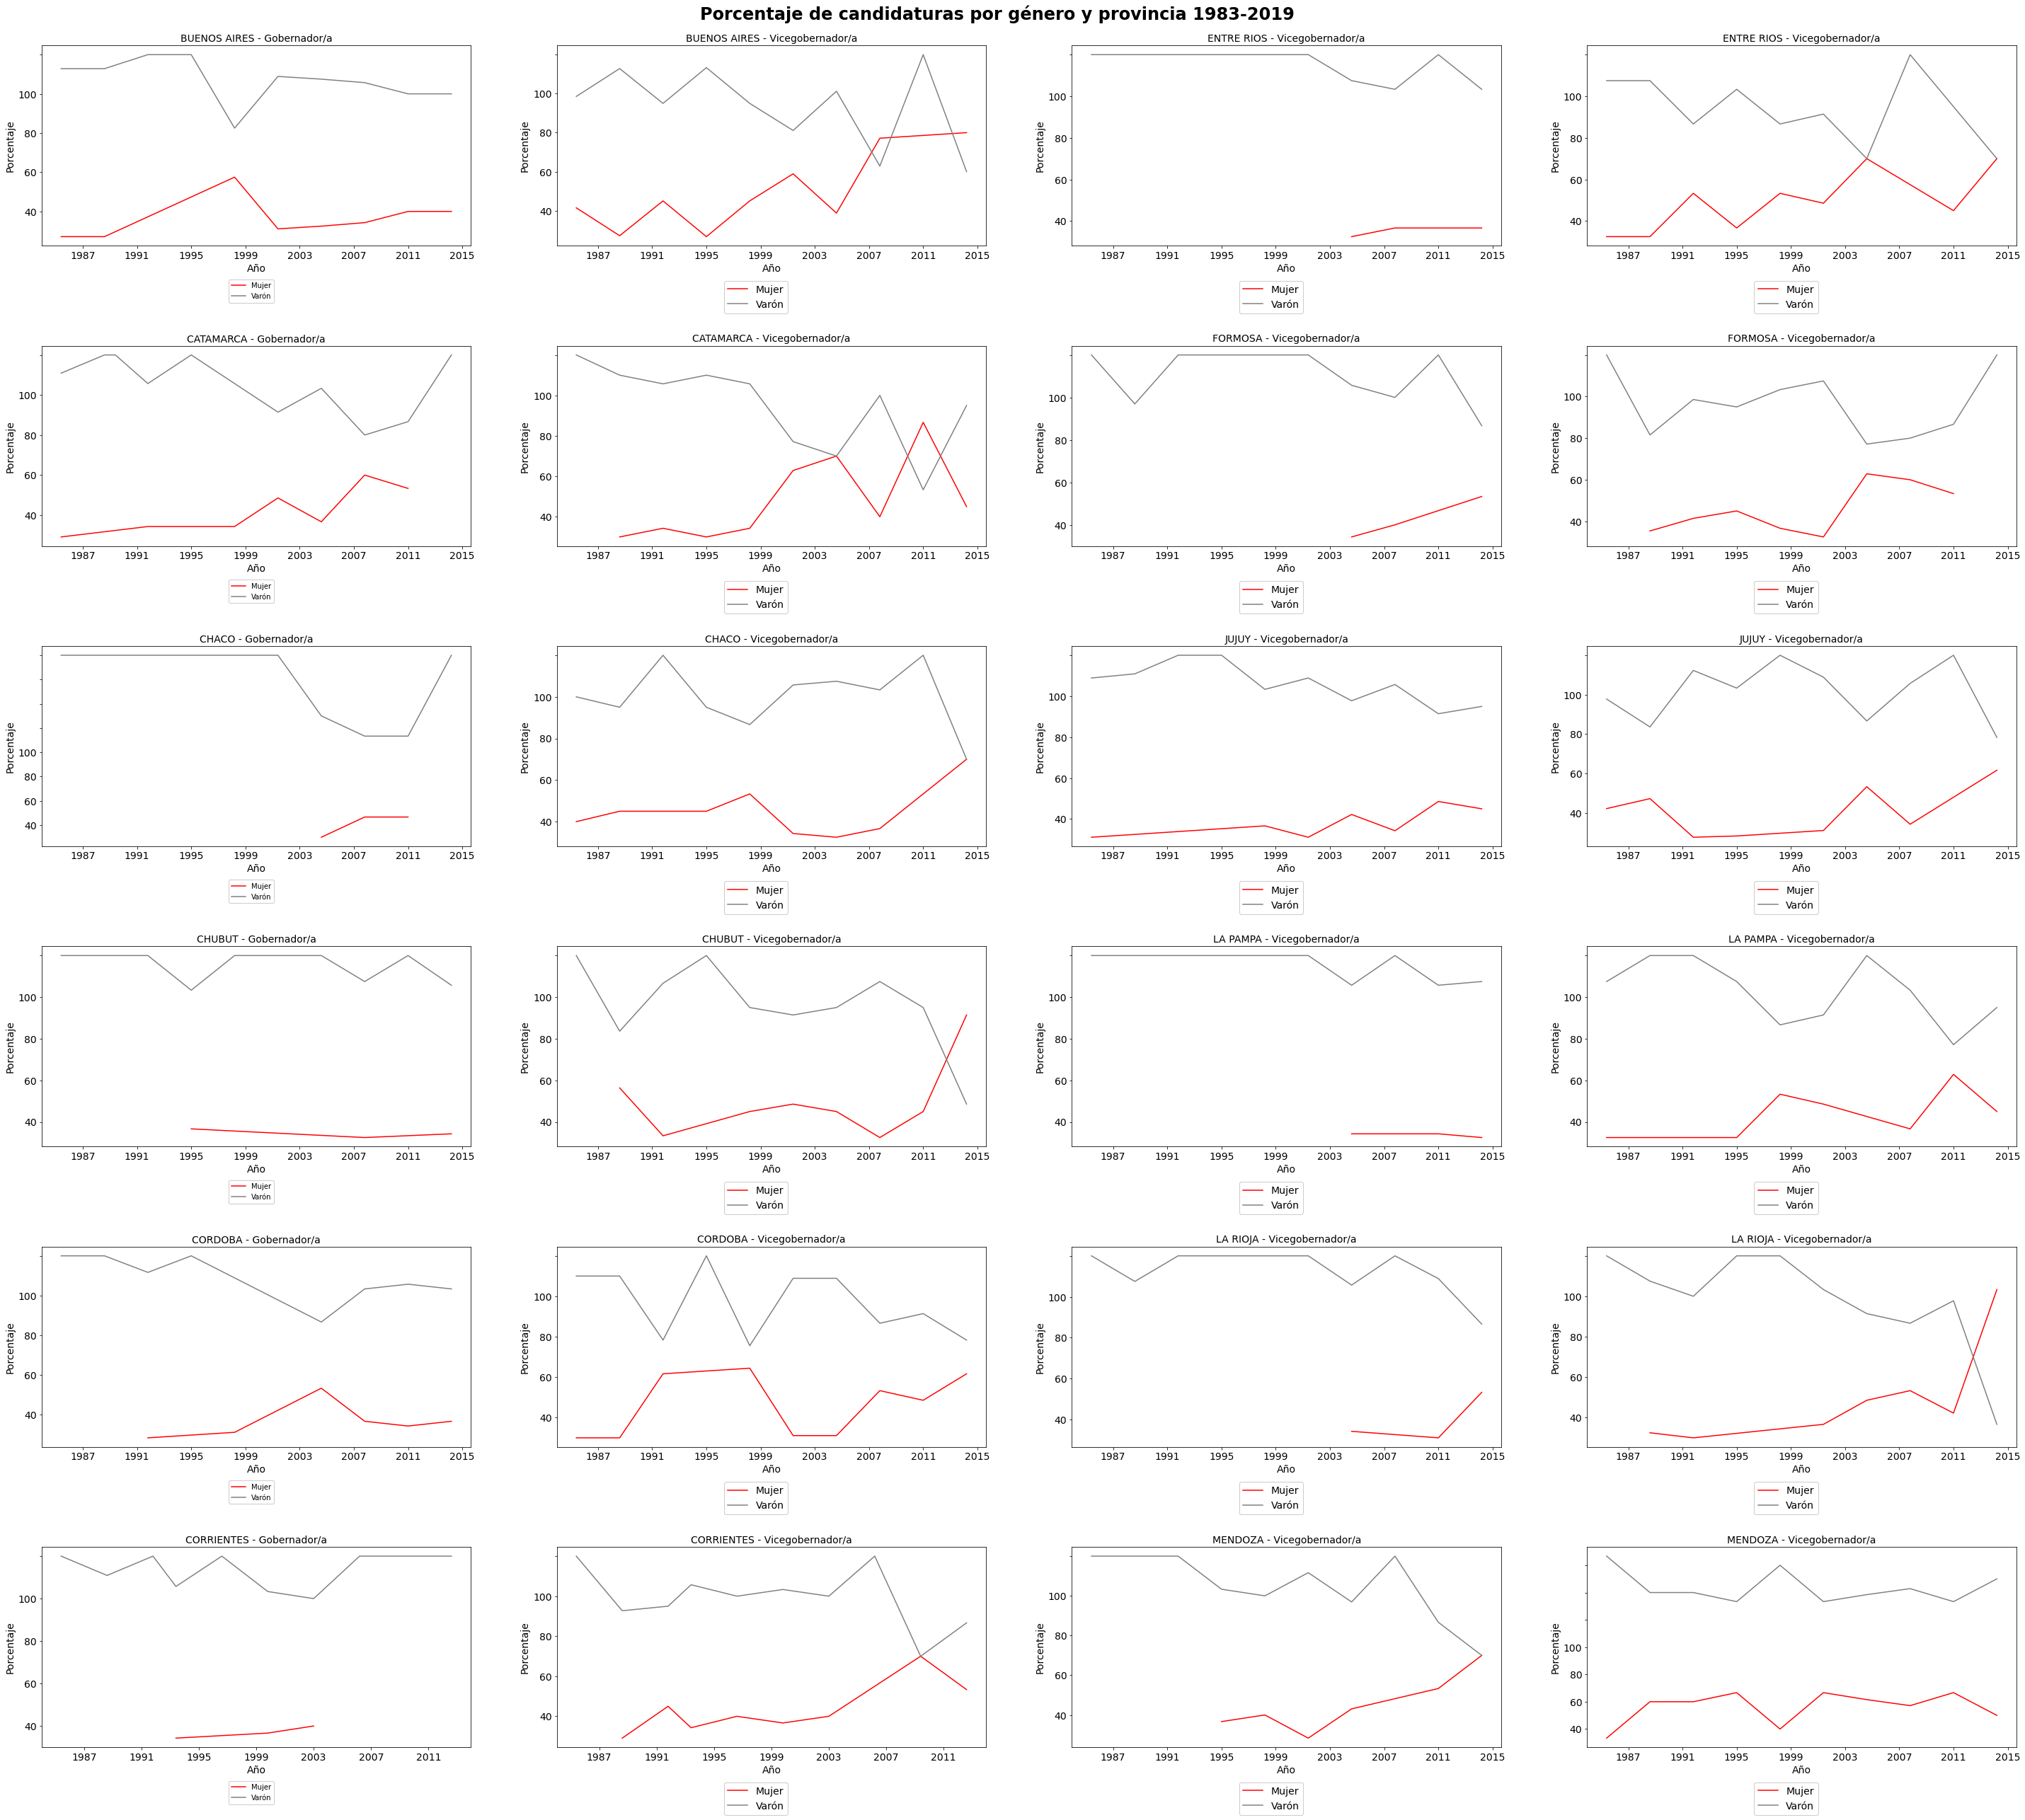

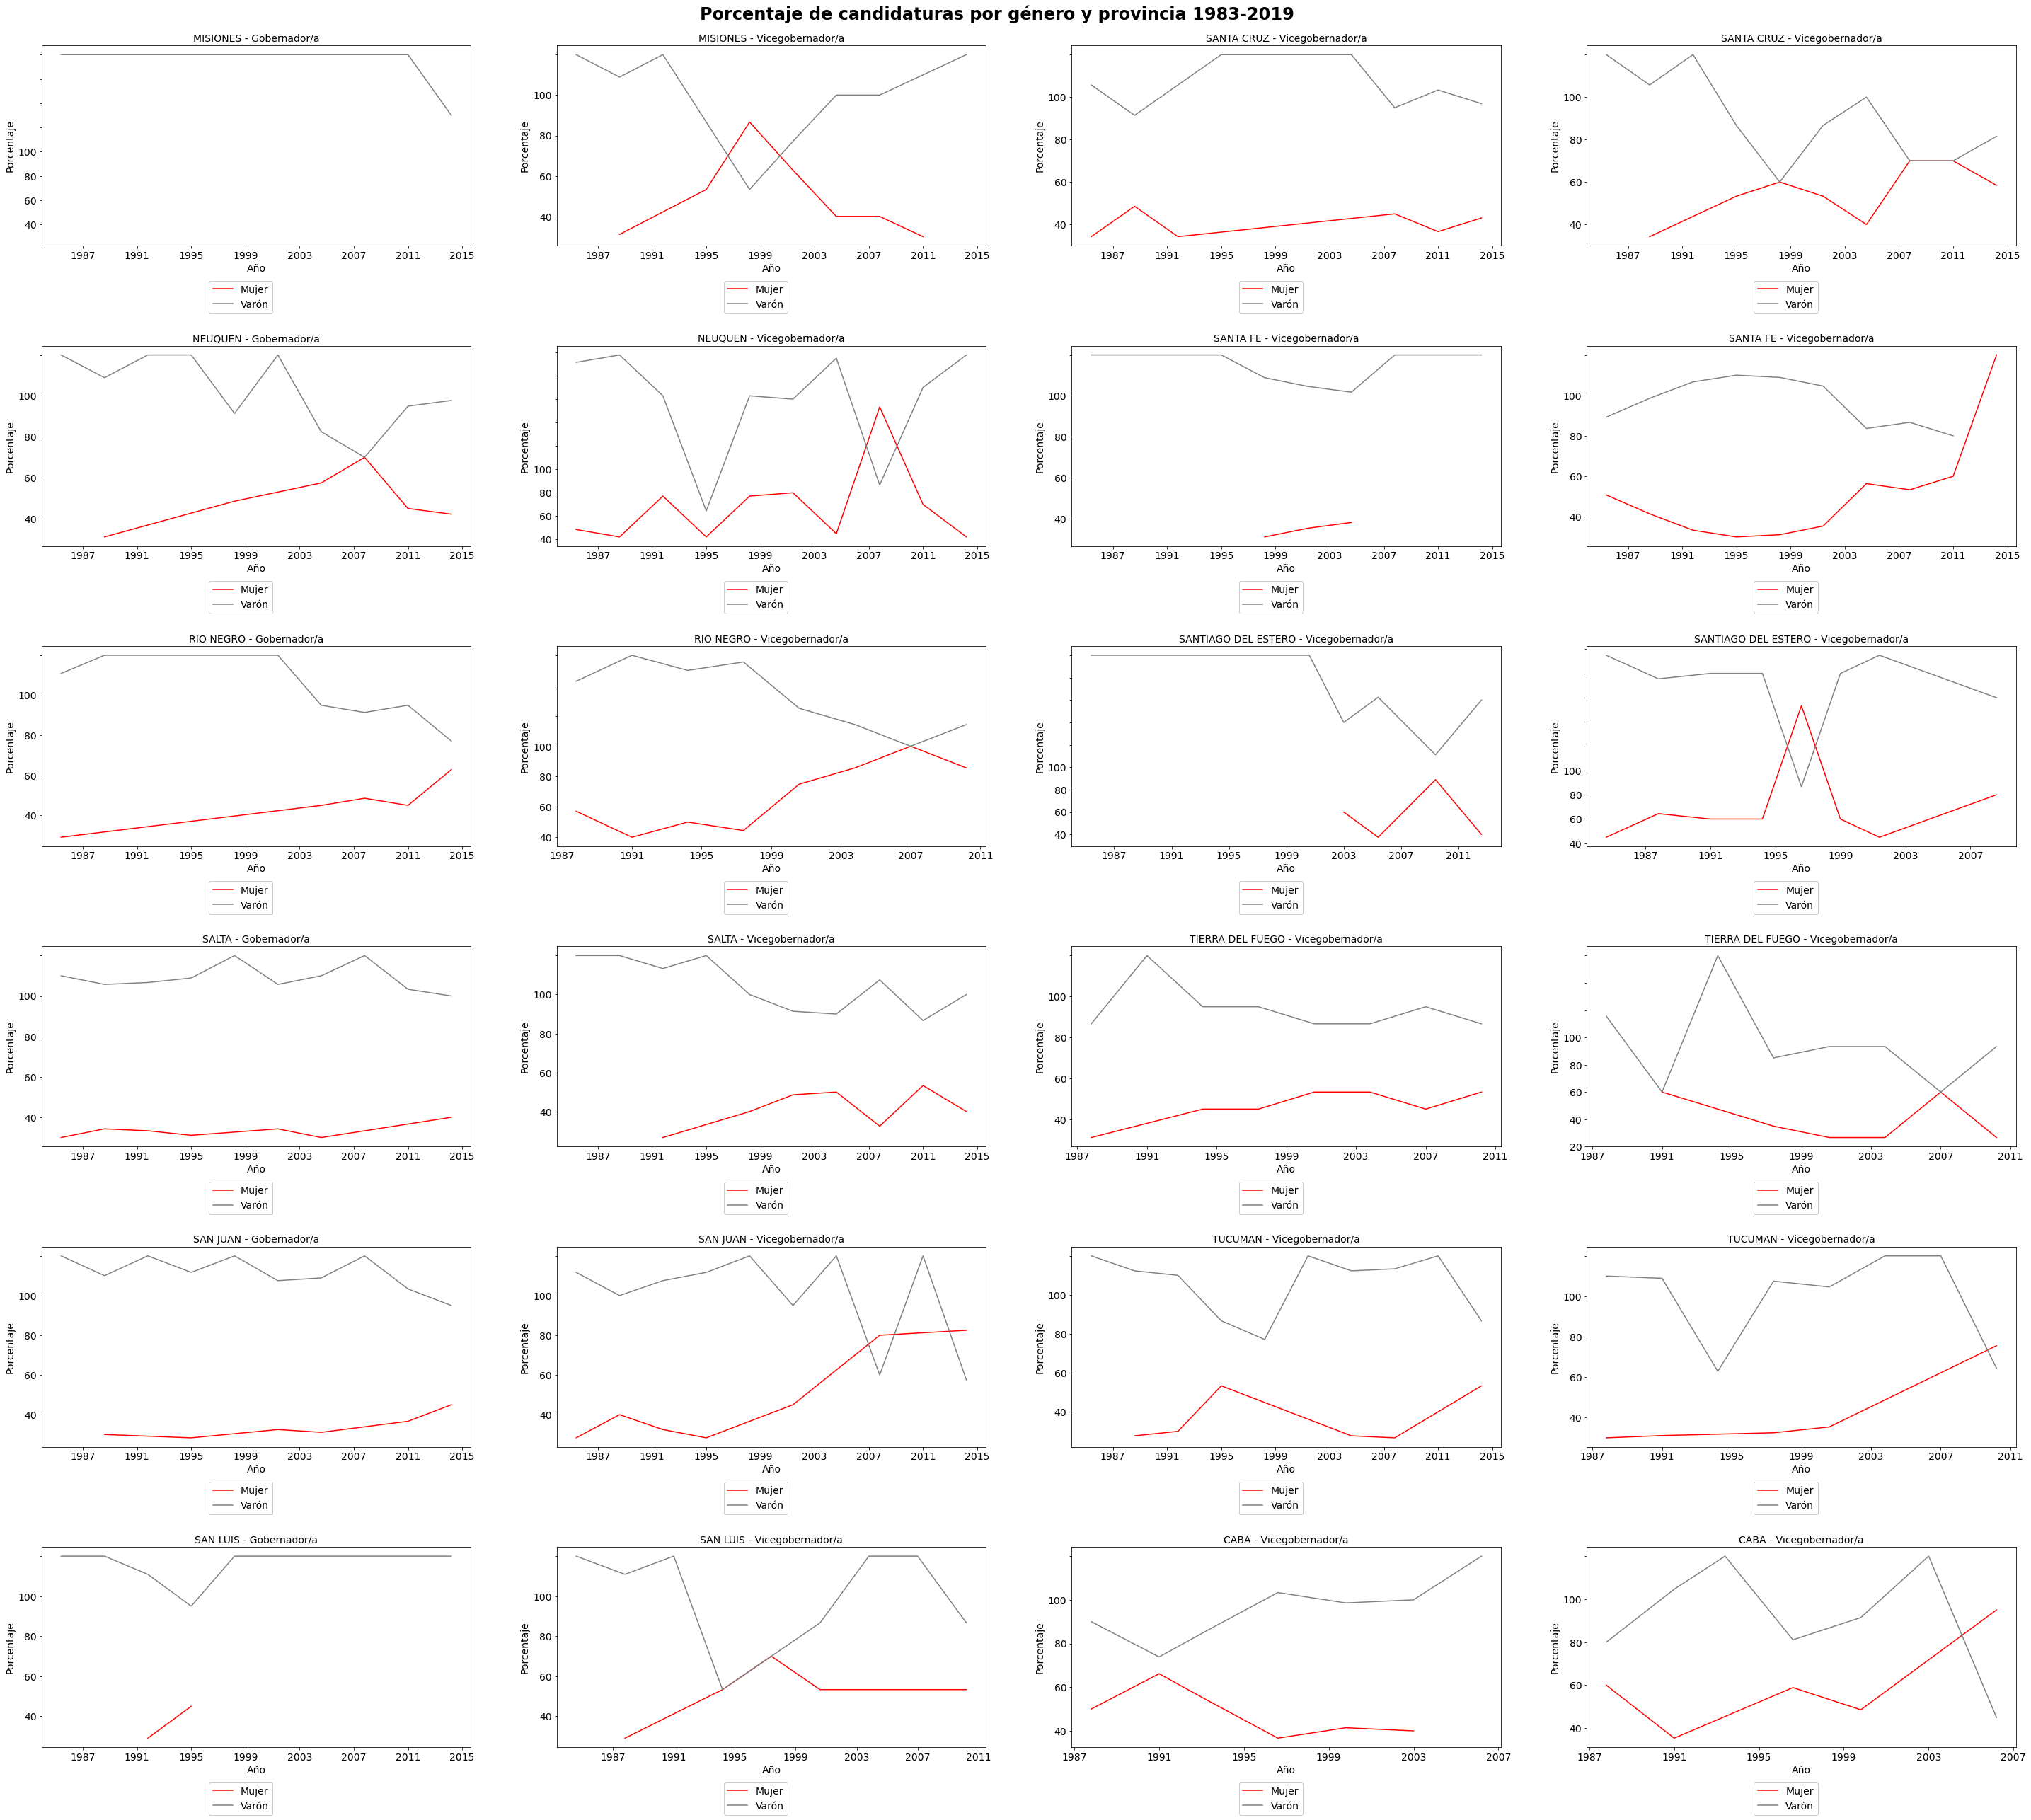

In [13]:
#Creación de gráficos en dos bloques
#Años electorales para ver en el eje X:
rangox=data2['election.year.calendar'].unique()
rangoy=[20,40,60,80,100]
fig, ax = plt.subplots(nrows=(data2['province.code'].max()/4).astype(int),ncols=4,figsize=(50,40))
fig.suptitle("Porcentaje de candidaturas por género y provincia 1983-2019",fontsize = 24,fontweight = 'bold')
fig.subplots_adjust(top=0.96,hspace=0.5)

for code in range(1,7):
    ax[code-1,0].plot(data2[(data2['province.code']==code)&(data2['position.label']=='Gobernador/a')&(data2['candidate.gender.label']=='Mujer')]['election.year.calendar'],
                      data2[(data2['province.code']==code)&(data2['position.label']=='Gobernador/a')&(data2['candidate.gender.label']=='Mujer')]['gender%'],color='red')
    ax[code-1,0].plot(data2[(data2['province.code']==code)&(data2['position.label']=='Gobernador/a')&(data2['candidate.gender.label']=='Varón')]['election.year.calendar'],
                      data2[(data2['province.code']==code)&(data2['position.label']=='Gobernador/a')&(data2['candidate.gender.label']=='Varón')]['gender%'],color='gray')
    ax[code-1,0].set_xlabel('Año',size=14)
    ax[code-1,0].set_ylabel('Porcentaje',size=14)
    ax[code-1,0].set_title((data2[data2['province.code']==code]['province.name'].iloc[0]+ ' - Gobernador/a'),size=14)
    ax[code-1,0].set_xticklabels(rangox,size=14)
    ax[code-1,0].set_yticklabels(rangoy,size=14)
    ax[code-1,0].legend(['Mujer','Varón'],fancybox=True, framealpha=1,frameon=True, bbox_to_anchor=(0.55,-0.15))
    ax[code-1,1].plot(data2[(data2['province.code']==code)&(data2['position.label']=='Vicebogernador/a')&(data2['candidate.gender.label']=='Mujer')]['election.year.calendar'],
                      data2[(data2['province.code']==code)&(data2['position.label']=='Vicebogernador/a')&(data2['candidate.gender.label']=='Mujer')]['gender%'],color='red')
    ax[code-1,1].plot(data2[(data2['province.code']==code)&(data2['position.label']=='Vicebogernador/a')&(data2['candidate.gender.label']=='Varón')]['election.year.calendar'],
                      data2[(data2['province.code']==code)&(data2['position.label']=='Vicebogernador/a')&(data2['candidate.gender.label']=='Varón')]['gender%'],color='gray')
    ax[code-1,1].set_xlabel('Año',size=14)
    ax[code-1,1].set_ylabel('Porcentaje',size=14)
    ax[code-1,1].set_title((data2[data2['province.code']==code]['province.name'].iloc[0]+ ' - Vicegobernador/a'),size=14)
    ax[code-1,1].set_xticklabels(rangox,size=14)
    ax[code-1,1].set_yticklabels(rangoy,size=14)
    ax[code-1,1].legend(['Mujer','Varón'],fancybox=True, framealpha=1,frameon=True, bbox_to_anchor=(0.55,-0.15),prop={'size': 14})

for code in range(7,13):
    ax[code-13,2].plot(data2[(data2['province.code']==code)&(data2['position.label']=='Gobernador/a')&(data2['candidate.gender.label']=='Mujer')]['election.year.calendar'],
                      data2[(data2['province.code']==code)&(data2['position.label']=='Gobernador/a')&(data2['candidate.gender.label']=='Mujer')]['gender%'],color='red')
    ax[code-13,2].plot(data2[(data2['province.code']==code)&(data2['position.label']=='Gobernador/a')&(data2['candidate.gender.label']=='Varón')]['election.year.calendar'],
                      data2[(data2['province.code']==code)&(data2['position.label']=='Gobernador/a')&(data2['candidate.gender.label']=='Varón')]['gender%'],color='gray')
    ax[code-13,2].set_xlabel('Año',size=14)
    ax[code-13,2].set_ylabel('Porcentaje',size=14)
    ax[code-13,2].set_title((data2[data2['province.code']==code]['province.name'].iloc[0]+ ' - Vicegobernador/a'),size=14)
    ax[code-13,2].set_xticklabels(rangox,size=14)
    ax[code-13,2].set_yticklabels(rangoy,size=14)
    ax[code-13,2].legend(['Mujer','Varón'],fancybox=True, framealpha=1,frameon=True, bbox_to_anchor=(0.55,-0.15),prop={'size': 14})
    ax[code-13,3].plot(data2[(data2['province.code']==code)&(data2['position.label']=='Vicebogernador/a')&(data2['candidate.gender.label']=='Mujer')]['election.year.calendar'],
                      data2[(data2['province.code']==code)&(data2['position.label']=='Vicebogernador/a')&(data2['candidate.gender.label']=='Mujer')]['gender%'],color='red')
    ax[code-13,3].plot(data2[(data2['province.code']==code)&(data2['position.label']=='Vicebogernador/a')&(data2['candidate.gender.label']=='Varón')]['election.year.calendar'],
                      data2[(data2['province.code']==code)&(data2['position.label']=='Vicebogernador/a')&(data2['candidate.gender.label']=='Varón')]['gender%'],color='gray')
    ax[code-13,3].set_xlabel('Año',size=14)
    ax[code-13,3].set_ylabel('Porcentaje',size=14)
    ax[code-13,3].set_title((data2[data2['province.code']==code]['province.name'].iloc[0]+ ' - Vicegobernador/a'),size=14)
    ax[code-13,3].set_xticklabels(rangox,size=14)
    ax[code-13,3].set_yticklabels(rangoy,size=14)
    ax[code-13,3].legend(['Mujer','Varón'],fancybox=True, framealpha=1,frameon=True, bbox_to_anchor=(0.55,-0.15),prop={'size': 14})

    
fig2, ax2 = plt.subplots(nrows=(data2['province.code'].max()/4).astype(int),ncols=4,figsize=(50,40))
fig2.suptitle("Porcentaje de candidaturas por género y provincia 1983-2019",fontsize = 24,fontweight = 'bold')
fig2.subplots_adjust(top=0.96,hspace=0.5)
for code in range(13,19):
    ax2[code-19,0].plot(data2[(data2['province.code']==code)&(data2['position.label']=='Gobernador/a')&(data2['candidate.gender.label']=='Mujer')]['election.year.calendar'],
                      data2[(data2['province.code']==code)&(data2['position.label']=='Gobernador/a')&(data2['candidate.gender.label']=='Mujer')]['gender%'],color='red')
    ax2[code-19,0].plot(data2[(data2['province.code']==code)&(data2['position.label']=='Gobernador/a')&(data2['candidate.gender.label']=='Varón')]['election.year.calendar'],
                      data2[(data2['province.code']==code)&(data2['position.label']=='Gobernador/a')&(data2['candidate.gender.label']=='Varón')]['gender%'],color='gray')
    ax2[code-19,0].set_xlabel('Año',size=14)
    ax2[code-19,0].set_ylabel('Porcentaje',size=14)
    ax2[code-19,0].set_title((data2[data2['province.code']==code]['province.name'].iloc[0]+ ' - Gobernador/a'),size=14)
    ax2[code-19,0].set_xticklabels(rangox,size=14)
    ax2[code-19,0].set_yticklabels(rangoy,size=14)
    ax2[code-19,0].legend(['Mujer','Varón'],fancybox=True, framealpha=1,frameon=True, bbox_to_anchor=(0.55,-0.15),prop={'size': 14})
    ax2[code-19,1].plot(data2[(data2['province.code']==code)&(data2['position.label']=='Vicebogernador/a')&(data2['candidate.gender.label']=='Mujer')]['election.year.calendar'],
                      data2[(data2['province.code']==code)&(data2['position.label']=='Vicebogernador/a')&(data2['candidate.gender.label']=='Mujer')]['gender%'],color='red')
    ax2[code-19,1].plot(data2[(data2['province.code']==code)&(data2['position.label']=='Vicebogernador/a')&(data2['candidate.gender.label']=='Varón')]['election.year.calendar'],
                      data2[(data2['province.code']==code)&(data2['position.label']=='Vicebogernador/a')&(data2['candidate.gender.label']=='Varón')]['gender%'],color='gray')
    ax2[code-19,1].set_xlabel('Año',size=14)
    ax2[code-19,1].set_ylabel('Porcentaje',size=14)
    ax2[code-19,1].set_title((data2[data2['province.code']==code]['province.name'].iloc[0]+ ' - Vicegobernador/a'),size=14)
    ax2[code-19,1].set_xticklabels(rangox,size=14)
    ax2[code-19,1].set_yticklabels(rangoy,size=14)
    ax2[code-19,1].legend(['Mujer','Varón'],fancybox=True, framealpha=1,frameon=True, bbox_to_anchor=(0.55,-0.15),prop={'size': 14})

for code in range(19,25):
    ax2[code-25,2].plot(data2[(data2['province.code']==code)&(data2['position.label']=='Gobernador/a')&(data2['candidate.gender.label']=='Mujer')]['election.year.calendar'],
                      data2[(data2['province.code']==code)&(data2['position.label']=='Gobernador/a')&(data2['candidate.gender.label']=='Mujer')]['gender%'],color='red')
    ax2[code-25,2].plot(data2[(data2['province.code']==code)&(data2['position.label']=='Gobernador/a')&(data2['candidate.gender.label']=='Varón')]['election.year.calendar'],
                      data2[(data2['province.code']==code)&(data2['position.label']=='Gobernador/a')&(data2['candidate.gender.label']=='Varón')]['gender%'],color='gray')
    ax2[code-25,2].set_xlabel('Año',size=14)
    ax2[code-25,2].set_ylabel('Porcentaje',size=14)
    ax2[code-25,2].set_title((data2[data2['province.code']==code]['province.name'].iloc[0]+ ' - Vicegobernador/a'),size=14)
    ax2[code-25,2].set_xticklabels(rangox,size=14)
    ax2[code-25,2].set_yticklabels(rangoy,size=14)
    ax2[code-25,2].legend(['Mujer','Varón'],fancybox=True, framealpha=1,frameon=True, bbox_to_anchor=(0.55,-0.15),prop={'size': 14})
    ax2[code-25,3].plot(data2[(data2['province.code']==code)&(data2['position.label']=='Vicebogernador/a')&(data2['candidate.gender.label']=='Mujer')]['election.year.calendar'],
                      data2[(data2['province.code']==code)&(data2['position.label']=='Vicebogernador/a')&(data2['candidate.gender.label']=='Mujer')]['gender%'],color='red')
    ax2[code-25,3].plot(data2[(data2['province.code']==code)&(data2['position.label']=='Vicebogernador/a')&(data2['candidate.gender.label']=='Varón')]['election.year.calendar'],
                      data2[(data2['province.code']==code)&(data2['position.label']=='Vicebogernador/a')&(data2['candidate.gender.label']=='Varón')]['gender%'],color='gray')
    ax2[code-25,3].set_xlabel('Año',size=14)
    ax2[code-25,3].set_ylabel('Porcentaje',size=14)
    ax2[code-25,3].set_title((data2[data2['province.code']==code]['province.name'].iloc[0]+ ' - Vicegobernador/a'),size=14)
    ax2[code-25,3].set_xticklabels(rangox,size=14)
    ax2[code-25,3].set_yticklabels(rangoy,size=14)
    ax2[code-25,3].legend(['Mujer','Varón'],fancybox=True, framealpha=1,frameon=True, bbox_to_anchor=(0.55,-0.15),prop={'size': 14})
plt.show()